In [27]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from utils.search import *
from utils.data_generator import *
from utils.kernels import *
from utils.svm_cvx import *
from libsvm.svmutil import *
from utils.svm_libsvm import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%reload_ext autoreload
%autoreload 2
sns.set_theme(style='darkgrid')

In [28]:
# Load Data
data= pd.read_csv('data.csv',header=None)
data.rename(columns={25:'target'},inplace=True)
data = data.astype({'target':int})


# Binary Classification

# Using 10 features
Lets take class 1 and class 4

In [29]:
# Load Data Taking only 10 features first
binary_data = data.query('target ==1 or target ==4')

X_train= np.array(binary_data.iloc[:,:10])
Y_train =np.array(binary_data.iloc[:,25])
Y_train[Y_train ==1] =1
Y_train[Y_train==4] =-1
Y_train.shape,X_train.shape

((662,), (662, 10))

In [ ]:
params = [#{'kernel': ['linear'], 'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]},
        #   {'kernel': ['gaussian'], 'C':[ 1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5], 'gamma':[ 1e-3,1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]},
          {'kernel': ['polynomial'], 'C':[
                                            1e-1,1e0,1e1,1e2,1e3,1e4,1e5], 'degree':[2, 3, 4,5,6,7,8]},
          ]
gsvm = gridSearchCV_SVM(paramGrid=params, X=X_train,
                        Y=Y_train, cv=5, estimator_type=0)
gsvm.run()
print(gsvm.best_param())
gsvm.plot_graph()


In [30]:
# Tuned hyperparameter for rbf kernel gamma=0.1 and C=10

model = SVM_CVX(kernel='polynomial',C=10,degree=3)
scores =model.kfold_cross_validation(X_train,Y_train,cv=5,random_state=True)
cv_score = scores[0]
print("cv_score",cv_score)
model.sv_x.shape

/Users/jaskeeratsinghsaluja/Documents/IITD Courses/ELL409/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


cv_score 0.9924470266575529


(17, 10)

# Using 25 Features (class 1 and 4)
Class 1 and 4 

In [ ]:
# Load Data Taking only 10 features first
binary_data = data.query('target ==1 or target ==4')

X_train= np.array(binary_data.iloc[:,:25])
Y_train =np.array(binary_data.iloc[:,25])
Y_train[Y_train ==1] =1
Y_train[Y_train==4] =-1
Y_train.shape,X_train.shape

In [ ]:
params = [#{'kernel': ['linear'], 'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]},
           #{'kernel': ['gaussian'], 'C':[ 1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5], 'gamma':[1e-3,1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]},
           {'kernel': ['polynomial'], 'C':[
                                             1e-1,1e0,1e1,1e2,1e3,1e4,1e5], 'degree':[2, 3, 4,5,6,7,8]},
          ]
gsvm = gridSearchCV_SVM(paramGrid=params, X=X_train,
                        Y=Y_train, cv=5, estimator_type=0)
gsvm.run()
print(gsvm.best_param())
gsvm.plot_graph()


In [ ]:
# Tuned hyperparameter for rbf kernel gamma=0.1 and C=10

model = SVM_CVX(kernel='polynomial',C=10,degree=3)
scores =model.kfold_cross_validation(X_train,Y_train,cv=5,random_state=True)
cv_score = scores[0]
print("cv_score",cv_score)
model.sv_x.shape

# Using 25 Features (Trying different Pairs of classes)
Class 5 and 9

In [181]:
# Load Data Taking only 10 features first
binary_data = data.query('target ==2 or target ==4')

X_train= np.array(binary_data.iloc[:,:25])
Y_train =np.array(binary_data.iloc[:,25])

Y_train.shape,X_train.shape

((644,), (644, 25))

In [ ]:
params = [#{'kernel': ['linear'], 'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]},
           {'kernel': ['gaussian'], 'C':[ 1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5], 'gamma':[1e-3,1e-2, 1e-1, 1e0, 1e1, 1e2,1e3]},
           #{'kernel': ['polynomial'], 'C':[
           #                                  1e-1,1e0,1e1,1e2,1e3,1e4,1e5], 'degree':[2, 3, 4,5,6,7,8]},
          ]
gsvm = gridSearchCV_SVM(paramGrid=params, X=X_train,
                        Y=Y_train, cv=5, estimator_type=0)
gsvm.run()
print(gsvm.best_param())
gsvm.plot_graph()


In [ ]:
# Tuned hyperparameter for rbf kernel gamma=0.1 and C=10

model = SVM_CVX(kernel='polynomial',C=10,degree=3)
scores =model.kfold_cross_validation(X_train,Y_train,cv=5,random_state=True)
cv_score = scores[0]
print("cv_score",cv_score)
model.sv_x.shape

# Multi-Class Clasification

# Using 10 features
Lets take class 1 and class 4

In [23]:
# Load Data Taking only 10 features first
X_train= np.array(data.iloc[:,:25])
Y_train =np.array(data.iloc[:,25])
Y_train.shape,X_train.shape

((3000,), (3000, 25))

{'C': 10000.0, 'degree': 4, 'kernel': 'polynomial', 'test_score': 0.9176666666666667, 'train_score': 0.13658333333333333}


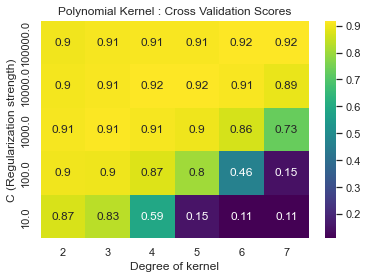

In [13]:
params = [  # {'kernel': ['linear'], 'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]},
             #{'kernel': ['rbf'], 'C':[ 1e-1, 1e0, 1e1, 1e2,1e3],
             #    'gamma':[1e-2, 1e-1, 1e0, 1e1,1e2,1e3]},
    {'kernel': ['polynomial'], 'C':[
         1e1,1e2,1e3,1e4,1e5], 'degree':[2, 3, 4, 5, 6,7]},
]
gsvm = gridSearchCV_SVM(paramGrid=params, X=X_train,
                        Y=Y_train, cv=5, estimator_type=0)
gsvm.run()
print(gsvm.best_param())
gsvm.plot_graph()


In [9]:
# using SKLEARN library
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [24]:
params = [ # {'kernel': ['linear'], 'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]},
    #  {'kernel': ['rbf'], 'C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 'gamma':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]},
    {'kernel': ['poly'], 'C':[
         1e1,1e2,1e3,1e4,1e5,1e6,1e7], 'degree':[ 2,3,4,5,6,7]},
]
grid = GridSearchCV(SVC(), params,verbose=2.5)

# fitting the model for grid search
grid.fit(X_train, Y_train)

pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(10)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .....C=10.0, degree=2, kernel=poly;, score=0.928 total time=   0.3s
[CV 2/5] END .....C=10.0, degree=2, kernel=poly;, score=0.915 total time=   0.3s
[CV 3/5] END .....C=10.0, degree=2, kernel=poly;, score=0.912 total time=   0.2s
[CV 4/5] END .....C=10.0, degree=2, kernel=poly;, score=0.910 total time=   0.2s
[CV 5/5] END .....C=10.0, degree=2, kernel=poly;, score=0.928 total time=   0.2s
[CV 1/5] END .....C=10.0, degree=3, kernel=poly;, score=0.945 total time=   0.2s
[CV 2/5] END .....C=10.0, degree=3, kernel=poly;, score=0.947 total time=   0.2s
[CV 3/5] END .....C=10.0, degree=3, kernel=poly;, score=0.932 total time=   0.2s
[CV 4/5] END .....C=10.0, degree=3, kernel=poly;, score=0.932 total time=   0.2s
[CV 5/5] END .....C=10.0, degree=3, kernel=poly;, score=0.913 total time=   0.2s
[CV 1/5] END .....C=10.0, degree=4, kernel=poly;, score=0.902 total time=   0.3s
[CV 2/5] END .....C=10.0, degree=4, kernel=poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.180946,0.002176,0.035391,0.000453,10000.0,3,poly,"{'C': 10000.0, 'degree': 3, 'kernel': 'poly'}",0.941667,0.950000,0.931667,0.935000,0.915000,0.934667,0.011662,1
31,0.190062,0.005561,0.039320,0.002411,1000000.0,3,poly,"{'C': 1000000.0, 'degree': 3, 'kernel': 'poly'}",0.941667,0.950000,0.931667,0.935000,0.915000,0.934667,0.011662,1
13,0.169050,0.001059,0.033725,0.001507,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.941667,0.950000,0.931667,0.935000,0.915000,0.934667,0.011662,1
7,0.158438,0.004899,0.030842,0.000276,100.0,3,poly,"{'C': 100.0, 'degree': 3, 'kernel': 'poly'}",0.941667,0.950000,0.931667,0.935000,0.915000,0.934667,0.011662,1
37,0.190841,0.005047,0.039413,0.001952,10000000.0,3,poly,"{'C': 10000000.0, 'degree': 3, 'kernel': 'poly'}",0.941667,0.950000,0.931667,0.935000,0.915000,0.934667,0.011662,1
25,0.182359,0.006990,0.037034,0.001188,100000.0,3,poly,"{'C': 100000.0, 'degree': 3, 'kernel': 'poly'}",0.941667,0.950000,0.931667,0.935000,0.915000,0.934667,0.011662,1
1,0.191896,0.007153,0.035137,0.003652,10.0,3,poly,"{'C': 10.0, 'degree': 3, 'kernel': 'poly'}",0.945000,0.946667,0.931667,0.931667,0.913333,0.933667,0.011991,7
0,0.206998,0.021290,0.055397,0.029164,10.0,2,poly,"{'C': 10.0, 'degree': 2, 'kernel': 'poly'}",0.928333,0.915000,0.911667,0.910000,0.928333,0.918667,0.008055,8
18,0.156026,0.004509,0.034662,0.000486,10000.0,2,poly,"{'C': 10000.0, 'degree': 2, 'kernel': 'poly'}",0.926667,0.906667,0.913333,0.908333,0.911667,0.913333,0.007071,9
30,0.165797,0.007110,0.036547,0.000660,1000000.0,2,poly,"{'C': 1000000.0, 'degree': 2, 'kernel': 'poly'}",0.926667,0.906667,0.913333,0.908333,0.911667,0.913333,0.007071,9


Text(30.5, 0.5, 'C (Regularization strength)')

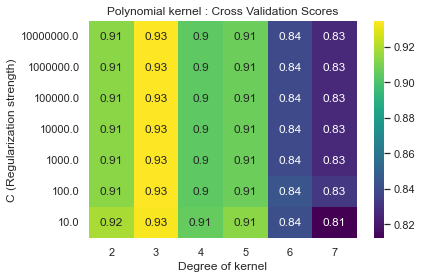

In [25]:
df= pd.DataFrame(grid.cv_results_)

plt.figure()
ax = sns.heatmap(df.loc[df['param_kernel'] == 'poly'].pivot('param_C', 'param_degree', 'mean_test_score'),
                 annot=True, cmap='viridis')
ax.set_title('Polynomial kernel : Cross Validation Scores')
ax.set_xlabel('Degree of kernel'), ax.invert_yaxis()
ax.set_ylabel('C (Regularization strength)')
